# README
this code does a lot of EDA on the data, since the humbug db paper doesn't dive in that deep into it and also it's a bit of a hassle to read really ...

it also implements the tinychirp's raw audio transformer on the humbug db data!

### General EDA


In [1]:
#load the HumBugDB into google colab, do some IDA first.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('humbugdb_zenodo_0_0_2.csv')
# df.head()
#so basicly after carefully reading the data
#only the country Tanazia is built for classification tasks.(from the HumBug DB paper)
df_task = df[(df["country"] == "Tanzania") & (df['location_type'] == 'cup')]
df_task.head()

,id,length,upload_time,name,sample_rate,sound_type,species,gender,fed,plurality,age,method,mic_type,device_type,country,district,province,place,location_type
1878,219949,65.097143,2021-05-23 21:44:00,IFA_17_24_664_background.wav,44100,background,NaN,NaN,NaN,NaN,NaN,HBN,telinga,tascam,Tanzania,Kilombero District,Morogoro,Ifakara,cup
1879,221103,2.560000,2021-05-23 21:44:00,IFA_17_24_664.wav,44100,mosquito,ma africanus,Female,f,Single,NaN,HBN,telinga,tascam,Tanzania,Kilombero District,Morogoro,Ifakara,cup
1880,221110,2.560000,2021-05-23 21:44:00,IFA_17_25_665.wav,44100,mosquito,ma africanus,Female,f,Single,NaN,HBN,telinga,tascam,Tanzania,Kilombero District,Morogoro,Ifakara,cup
1881,221111,2.560000,2021-05-23 21:44:00,IFA_17_25_665.wav,44100,mosquito,ma africanus,Female,f,Single,NaN,HBN,telinga,tascam,Tanzania,Kilombero District,Morogoro,Ifakara,cup
1882,221149,2.560000,2021-05-23 21:44:00,IFA_17_26_666.wav,44100,mosquito,an arabiensis,Female,f,Single,NaN,HBN,telinga,tascam,Tanzania,Kilombero District,Morogoro,Ifakara,cup


In [2]:
#what are all the values of this sound_type column?
df_task["sound_type"].unique()

array(['background', 'mosquito'], dtype=object)

In [6]:
#let's get the total number of background sound in hours.
lengthOfBackGrounds = df[ df["sound_type"] == "background" ] ["length"]
total_background_hours = lengthOfBackGrounds.sum() / (60*60)
print(f"total background hours: {total_background_hours:.2f} hours") #paper says there's 15 hours, so we're good.

lengthOfBackGrounds = df_task[ df_task["sound_type"] == "background" ] ["length"]
total_background_hours = lengthOfBackGrounds.sum() / (60*60)
print(f"background hours of The classification task: {total_background_hours:.2f} hours") #1.56 hours, pretty good since it's only background stuff

total background hours: 14.59 hours
background hours of The classification task: 1.56 hours


In [8]:
lengthOfBackGrounds = df[ df["sound_type"] == "mosquito" ] ["length"]
total_background_hours = lengthOfBackGrounds.sum() / (60*60)
print(f"total mosquito sounds: {total_background_hours:.2f} hours")

lengthOfBackGrounds = df_task[ df_task["sound_type"] == "mosquito" ] ["length"]
total_background_hours = lengthOfBackGrounds.sum() / (60*60)
print(f"mosquito sounds for classification task: {total_background_hours:.2f} hours") #of all useable data there's 11.68 that we can use

total mosquito sounds: 18.35 hours
mosquito sounds for classification task: 11.68 hours


In [13]:
#given that the sound type is mosquito, how many species are there?
species = df[ df["sound_type"] == "mosquito" ] ["species"] #from mosqutios, give the species of every mosquito
print(f"number of unique species: {len(species.unique())}") #it can't be 39 ... ? paper says there's only 36.
# note that there's a "nan" value in the output, so there's 38 classes
print("all species: ")
print(species.unique())

#after some reserch, historicly, an gambiae was just a type of group that carry malaria
#later then it was known that this is a huge complex type that contains many species,
#some of them carry diseases like malaria and some don't, such as "an gambiae ss", "an arabiensis", "an coluzzii" (carries it-not only malaria btw)
#while "an quadriannulatus" -also a part of an gambiae sl- dosn't carry diseases.

#also note that having an gambiae sI(the complex of an gambiae) dosn't make sense if you're having an gambiae without sI or ss | just a repeting species,
#now it's down to 37 unique species.
#same as having "an funestus si" and "an funestus ss" and "an funestus" without anything, since you mentioned the complex twice.
# now we're down to the sweet 36 in the paper. the rest are just stupid naming systems...

#I really don't know why they repeated those classes in this way, I had to do a lot of reserch in entomology to understand that

print('\n')
species = df_task[ df_task["sound_type"] == "mosquito" ] ["species"] #out of the usable ones, we have only 18 types

print(f"number of unique species of the classification task: {len(species.unique())}")
print("The species of the classification task: ")
print(species.unique())

number of unique species: 39
all species: 
['ae aegypti' 'ae albopictus' 'an albimanus' 'an arabiensis'
 'an atroparvus' 'an coluzzii' 'an dirus' 'an farauti' 'an freeborni'
 'an funestus' nan 'an gambiae' 'an merus' 'an minimus'
 'an quadriannulatus' 'an sinensis' 'an stephensi'
 'culex quinquefasciatus' 'culex tarsalis' 'ma africanus' 'ma uniformis'
 'culex pipiens complex' 'an funestus ss' 'an funestus sl' 'an ziemanni'
 'an pharoensis' 'an gambiae sl' 'culex tigripes' 'an leesoni'
 'an squamosus' 'an coustani' 'an rivulorum' 'coquillettidia sp'
 'an maculipalpis' 'an gambiae ss' 'toxorhynchites brevipalpis'
 'an harrisoni' 'an maculatus' 'an barbirostris']


number of unique species of the classification task: 18
The species of the classification task: 
['ma africanus' 'an arabiensis' 'ma uniformis' 'culex pipiens complex' nan
 'an funestus ss' 'an funestus sl' 'an ziemanni' 'an pharoensis'
 'an gambiae sl' 'culex tigripes' 'an leesoni' 'ae aegypti' 'an squamosus'
 'an coustani' 'a

In [20]:
#now let's querry for every species with the total length that it has
mosquitos = df_task[ df_task["sound_type"] == "mosquito" ] #all mosquitos
total_lengths = mosquitos.groupby("species")["length"].sum() #a Series of each species | its length

print(f"number of mosquito recordings (classification task): {len(mosquitos)} (each recording might contain a lot of k-length segments)")
print(total_lengths, '\n')

#do remember that this is in seconds, anything less then 5min is not that useful,
#let's only look at the things with more than 5min
total_lengths = total_lengths[total_lengths > 5*60]
total_lengths = total_lengths.sort_values(ascending=False) #sort it to be cute
print("classes with more then 5min of data: (sorted to be cute)")
total_lengths

number of mosquito recordings (classification task): 2582 (each recording might contain a lot of k-length segments)
species
ae aegypti                1322.44
an arabiensis            14815.20
an coustani               1140.62
an funestus sl            1542.06
an funestus ss            7414.24
an gambiae sl              406.74
an leesoni                  43.46
an maculipalpis           2012.98
an pharoensis               56.26
an rivulorum                 5.12
an squamosus              2091.80
an ziemanni                110.02
coquillettidia sp           25.60
culex pipiens complex     8157.76
culex tigripes             158.66
ma africanus               785.20
ma uniformis              1654.58
Name: length, dtype: float64 

classes with more then 5min of data: (sorted to be cute)


,length
species,
an arabiensis,14815.20
culex pipiens complex,8157.76
an funestus ss,7414.24
an squamosus,2091.80
an maculipalpis,2012.98
ma uniformis,1654.58
an funestus sl,1542.06
ae aegypti,1322.44
an coustani,1140.62


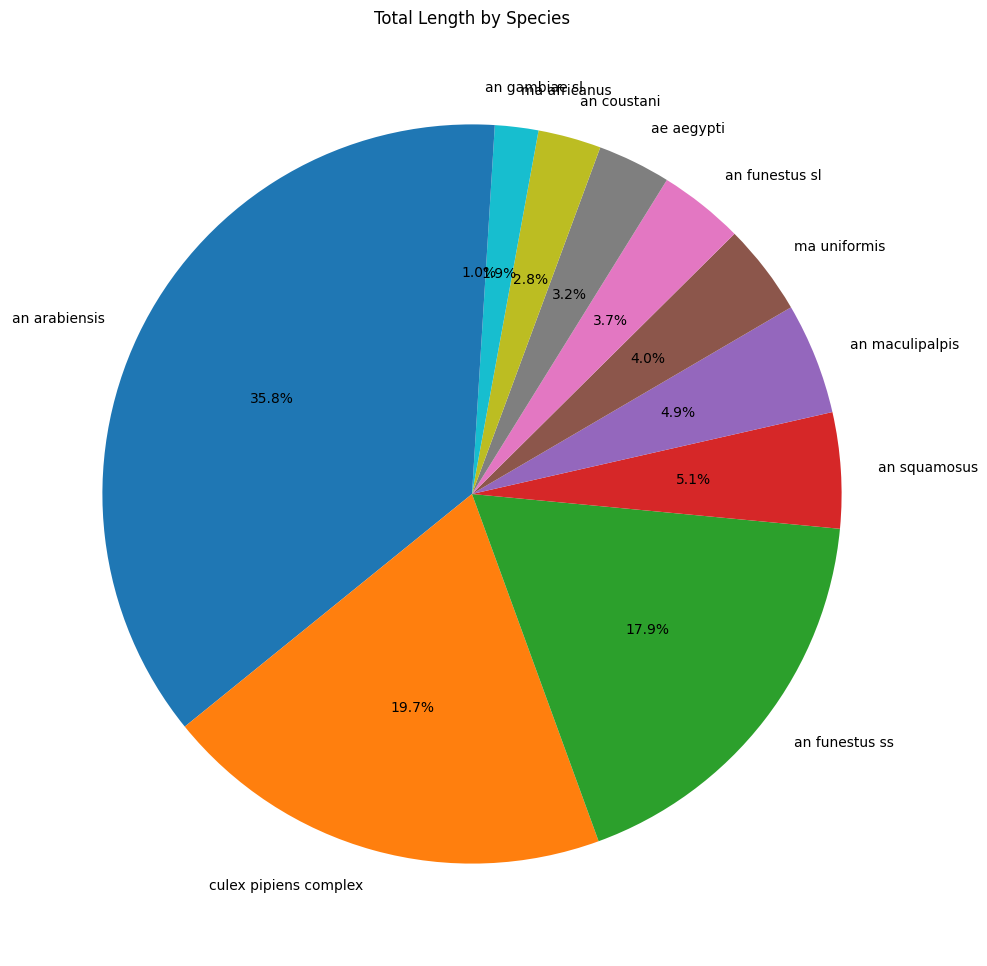

In [21]:
 #to be EVEN MORE cute, let's do a piechart of the total_length Series

total_lengths.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(12, 12),
    title="Total Length by Species"
)

plt.ylabel("")
plt.show()

### samplerates and microphones used

In [23]:
#now let's talk samplerate
samplerates = df[ (df["sound_type"] == "mosquito") | (df["sound_type"] == "background")]
print(f'the unique samplerates in the dataset: {samplerates["sample_rate"].unique()}\n') #wow, so either 8000 or 44.1 Khz, tf?
#let's only check mosquito this time.
intrested_mosquitos = df[ (df["sound_type"] == "mosquito") & (df['species'].isin(list(total_lengths.index))) ] #of the mosquitos, the ones with species that have total length bigger than 5min, what are the unique sample rates

print(f'unique sample rates of each of species: ')
intrested_mosquitos.groupby("species")['sample_rate'].unique()

#note that I'm really intrested in "ae aegypti" since it's in my hometown رياض, and "an arabiensis" since it's in saudi in general, and in afreica, also since it's the overwhelming majority of the data
#also intrested in "an funestus ss" since it has a lot of data and very famous for carrying malaria in africa

#sample rate is unfourtinatly not uniform ... this is sub-optimal to say the least

the unique samplerates in the dataset: [ 8000 44100]

unique sample rates of each of species: 


,sample_rate
species,
ae aegypti,"[8000, 44100]"
an arabiensis,"[8000, 44100]"
an coustani,[44100]
an funestus sl,[44100]
an funestus ss,[44100]
an gambiae sl,[44100]
an maculipalpis,[44100]
an squamosus,[44100]
culex pipiens complex,[44100]


In [24]:
#now let's check the mic_type for the mosquitos
intrested_mosquitos.groupby("species")['mic_type'].unique()

,mic_type
species,
ae aegypti,"[phone, telinga]"
an arabiensis,"[phone, telinga]"
an coustani,[telinga]
an funestus sl,[telinga]
an funestus ss,[telinga]
an gambiae sl,[telinga]
an maculipalpis,[telinga]
an squamosus,[telinga]
culex pipiens complex,[telinga]


In [25]:
#let's check the same thing but with the classification task
samplerates = df_task[ (df_task["sound_type"] == "mosquito") | (df_task["sound_type"] == "background")]
print(f'the unique samplerates in the dataset: {samplerates["sample_rate"].unique()}\n') #they all have uniform sample_rate. the parts from the classification.

#let's only check mosquito this time.
intrested_mosquitos = df_task[ (df_task["sound_type"] == "mosquito") & (df_task['species'].isin(list(total_lengths.index))) ] #of the mosquitos, the ones with species that have total length bigger than 5min, what are the unique sample rates
intrested_mosquitos.groupby("species")['sample_rate'].unique()

the unique samplerates in the dataset: [44100]



,sample_rate
species,
ae aegypti,[44100]
an arabiensis,[44100]
an coustani,[44100]
an funestus sl,[44100]
an funestus ss,[44100]
an gambiae sl,[44100]
an maculipalpis,[44100]
an squamosus,[44100]
culex pipiens complex,[44100]


In [26]:
df_task.groupby("mic_type")['sample_rate'].unique() #they only used telinga, GREAT !

,sample_rate
mic_type,
telinga,[44100]


### Length of recordings:

In [32]:
#one thing I noticed is that the length is NOT constant at all
#average length per species:

maskOfIntrestedMosquito = (df_task['sound_type'] == 'mosquito') & (df_task['species'].isin(list(total_lengths.index)))
intrested_classes = df_task[(maskOfIntrestedMosquito) | (df_task['sound_type'] == 'background')]

print(f'number of recordings of intrested classes: {len(intrested_classes)}\n')
print("all unique lengths:\n",intrested_classes["length"].unique())
# print(intrested_classes[intrested_classes['length'] > 11]['id'].count())
print("\nmean length of a sample from each class of mosquitos: ")
intrested_mosquitos.groupby("species")["length"].mean()

number of recordings of intrested classes: 2604

all unique lengths:
 [ 65.09714286   2.56         2.56        38.4          5.12
  12.8          2.5          7.68        58.38367347  10.24
  17.92        64.96653061   5.12        15.36        30.72
 125.4922449   28.1          7.62        63.94        35.78
  43.46        20.48         5.06        91.01061224  78.1322449
  91.29795918  60.89142857  61.3877551   23.04       117.76
  46.08        10.18        77.40081633  33.28        25.6
  17.86        66.76897959  22.98        20.42        40.9
  28.16        57.26040816  15.3         59.48081633  12.74
  25.54        51.38285714  52.97632653  30.66        60.81306122
  33.22        41.97877551  60.23836735  40.96        60.70857143
  60.39510204  60.55183673  38.34        48.58        60.42122449
  51.14        60.60408163  56.92081633  59.82040816  47.07265306
  50.18122449  53.7         61.38        52.84571429  35.84
  60.34285714  60.94367347  45.84489796  50.49469388  67.030204

,length
species,
ae aegypti,14.858876
an arabiensis,17.828159
an coustani,12.398043
an funestus sl,14.827500
an funestus ss,19.459948
an gambiae sl,9.684286
an maculipalpis,25.480759
an squamosus,14.835461
culex pipiens complex,14.968367


### Names:
note that names of recordings aren't unique, there are recordings with the same name, the paper places a unique id to each row in the csv for this reason, which is the name of each file: "id.wav"

In [33]:
print("number of recordings in total: ", len(intrested_mosquitos))

print("number of unique names: ", len(intrested_mosquitos["name"].unique()))

number of recordings in total:  2513
number of unique names:  1541


# segment audio clips, train the Raw audio Transformer Model of the TinyChirp paper

so this part is a bit chaotic, it's the first code i wrote in this project, it's meant to be used once and thrown away as i didn't intend to publish this anywhere and just wanted to test the water a bit

In [ ]:
import os
os.listdir('/content/drive/MyDrive/train')[:10] #good.
#so far so good. so now we have every file as: "/content/drive/MyDrive/train/id.wav" -> file of id #.
#we also know that each id is unique, however not every name is unique.

#note that maybe sorting data by using id is better. however ain't no way in hell i'm doing that حل عني
#classes:
classes = ['an arabiensis','culex pipiens complex', 'an funestus ss'] # and also background. do another loop for it


In [34]:
from sklearn.utils import shuffle
#just relized that I'm splitting them first then segmenting which is stupid since a recording in the test set could have >1000s
train_recordings = []
train_labels = []

test_recordings  = []
test_labels = []

train_fraction = 0.8

for i in range(len(classes)):
            length_of_class = len(df_task[df_task.species == classes[i]]) #get length of class
            n_train = int(length_of_class * train_fraction) #do the split
            n_test = length_of_class - n_train
            print(classes[i], n_train, n_test)

            df_class = df_task[df_task.species == classes[i]] #df of spices
            split = df_class.id
            train_recordings.extend(split[:n_train])  #extend training
            test_recordings.extend(split[n_train:])   #extend test
            #fill labels
            train_labels.extend([i] * n_train)
            test_labels.extend([i] * n_test)


#now extend it with the backgrounds
length_of_class = len(df_task[df_task.sound_type == 'background']) #get length of background
n_train = int(length_of_class * train_fraction) #do the split
n_test = length_of_class - n_train
print("Background", n_train, n_test)
df_class = df_task[df_task.sound_type == 'background'] #df of spices
split = df_class.id
train_recordings.extend(split[:n_train])  #extend training
test_recordings.extend(split[n_train:])   #extend test
#fill labels
train_labels.extend([3] * n_train)
test_labels.extend([3] * n_test)
print(train_recordings[:10])
print(train_labels[len(train_labels)-20:])

an arabiensis 664 167
culex pipiens complex 436 109
an funestus ss 304 77
Background 72 19
[221149, 221150, 221143, 221200, 221201, 221166, 221165, 221167, 221181, 221180]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [ ]:
#this line should just check if I got every id in the train and test recording
assert len(train_recordings) + len(test_recordings) == len(df_task[(df_task['species'].isin(classes)) | (df_task['sound_type'] == 'background')])

In [ ]:
# code to install samplerate
!pip uninstall -y cmake

!export CFLAGS="-fPIC"
!export CXXFLAGS="-fPIC"

!pip install samplerate


In [ ]:
#now this cell will give us a list with ALL 5s audio clips !
import librosa

def segment_audio(audio_path, segment_length_sec=3, overlap_sec=0.050): #this stupid method
#takes audio path. breaks it into "segment_length_sec" segments, then fucking does its thing and give me a list of all segments

    path = '/content/drive/MyDrive/train/' + str(audio_path) + '.wav' #HARD CODINGGGGGGG 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥
    y, current_sr = librosa.load(path, sr=None, mono=True) # Load as mono
    y = librosa.resample(y, orig_sr=current_sr, target_sr=current_sr/2) #downsample

    sr = current_sr/2 # samplerate = 44.1K / 2 |nyquiest thingy

    segment_length_samples = int(segment_length_sec * sr) # 3*22.5K
    overlap_samples = int(overlap_sec * sr)
    hop_length_samples = segment_length_samples - overlap_samples

    segments = []

    if len(y) < segment_length_samples: #if audio is less then 3s
        segment = np.pad(y, (0, segment_length_samples - len(y)), 'constant')
        segments.append(segment)
        return segments

    num_hops = int(np.floor((len(y) - segment_length_samples) / hop_length_samples)) + 1
    for i in range(num_hops):
        start_sample = i * hop_length_samples
        end_sample = start_sample + segment_length_samples

        # Pad the last segment if it's shorter (this will only happen if the total audio length
        # doesn't perfectly divide into segments using the hop_length)
        if end_sample > len(y):
            segment = np.pad(y[start_sample:], (0, end_sample - len(y)), 'constant')
        else:
            segment = y[start_sample:end_sample]

        segments.append(segment)

    return segments

#now loop over all of the recordings, do this method over all of them, and stack the resulting segments into a final list

In [35]:
from tqdm import tqdm
train_segments = []
train_segment_labels = []
for audio_path, label in tqdm(zip(train_recordings, train_labels), total=len(train_recordings)):
    segments_from_file = segment_audio(audio_path)

    # Add all segments from this file to the master list
    train_segments.extend(segments_from_file)

    # For each segment generated from this file, assign its original file's label
    train_segment_labels.extend([label] * len(segments_from_file))

test_segments = []
test_segment_labels = []
for audio_path, label in tqdm(zip(test_recordings, test_labels), total=len(test_recordings)):
    segments_from_file = segment_audio(audio_path)

    # Add all segments from this file to the master list
    test_segments.extend(segments_from_file)

    # For each segment generated from this file, assign its original file's label
    test_segment_labels.extend([label] * len(segments_from_file))

100%|██████████| 372/372 [00:22<00:00, 16.47it/s]


In [ ]:
#savev the extracted lists on a file
output_dir = "/drive/MyDrive/processed_audio_data/" # Or any other path in your Drive
training_segments_filename = os.path.join(output_dir, "training_audio_segments.pkl")
testing_segments_filename = os.path.join(output_dir, "testing_audio_segments.pkl")

training_labels_filename = os.path.join(output_dir, "training_segments_labels.pkl")
testing_labels_filename = os.path.join(output_dir, "testing_segments_labels.pkl")

#i've made the directory up
os.makedirs(output_dir, exist_ok=True)

import pickle

with open(training_segments_filename, 'wb') as f:
    pickle.dump(train_segments, f)

with open(testing_segments_filename, 'wb') as f:
    pickle.dump(test_segments, f)

with open(training_labels_filename, 'wb') as f:
    pickle.dump(train_segment_labels, f)

with open(testing_labels_filename, 'wb') as f:
    pickle.dump(test_segment_labels, f)

In [39]:
train_segments
train_segment_labels[len(train_segment_labels)-10:]

print(f"train segments: {len(train_segments)}") #surprisingly it's sort of 80:20
print(f"test segments: {len(test_segments)}")


# previous segments:
# train segments: 8704
# test segments: 3131

train segments: 8382
test segments: 3043


In [ ]:
#create a pytorch dataset class and get the items from the segments list that we just made
import torch
from torch.utils.data import Dataset
import torchaudio.transforms as T
import random

class AudioDataset(Dataset):
    def __init__(self, segments, labels):
        self.segments = segments
        self.labels = labels

        self.augmentations = [
            T.Vol(0.8),                         # Lower volume
            T.Vol(1.3),                         # Increase volume
        ] #make it better with time, this is just till i finish the stupid training thing
        #i wonder if I'll be happy one day

    def __len__(self):
        return len(self.segments)

    def __getitem__(self, idx):
        segment = self.segments[idx]
        label = self.labels[idx]

        segment = torch.tensor(segment, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)

        #let's do some data augmentations
        if random.random() < 0.3:
            aug = random.choice(self.augmentations)
            segment = aug(segment)

        return segment, label

train_dataset = AudioDataset(train_segments, train_segment_labels)
test_dataset = AudioDataset(test_segments, test_segment_labels)

train_dataset[0][0].shape
assert 66150 == 44_100 * 3/2 #if each sample is indeed 3s of 44.1Khz / 2

In [ ]:
#making a random sampler before feeding it to the dataloader
from collections import Counter
import torch
from torch.utils.data import WeightedRandomSampler

class_counts = Counter(train_segment_labels)
class_weights = {cls: 1.0 / count for cls, count in class_counts.items()} #{0:1/94123, ...}

# Assign weight to each sample based on its class
sample_weights = [class_weights[label] for label in train_segment_labels]
sample_weights_tensor = torch.DoubleTensor(sample_weights)

sampler = WeightedRandomSampler(
    weights=sample_weights_tensor,
    num_samples=len(sample_weights_tensor),
    replacement=False  # Allows repeated samples to balance things out
)

In [40]:
#make dataloaders of my train_dataset
from torch.utils.data import DataLoader

#note that since I have replacement turned on this will get A LOT of repeted values for the model
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
next(iter(train_loader))


[tensor([[ 0.0016,  0.0016,  0.0017,  ..., -0.0005, -0.0004, -0.0004],
         [-0.0005, -0.0005, -0.0004,  ..., -0.0010, -0.0010, -0.0010],
         [ 0.0035,  0.0035,  0.0034,  ..., -0.0040, -0.0039, -0.0037],
         ...,
         [ 0.0172,  0.0173,  0.0170,  ...,  0.0053,  0.0051,  0.0051],
         [ 0.0035,  0.0035,  0.0035,  ..., -0.0011, -0.0011, -0.0013],
         [-0.0004, -0.0006, -0.0006,  ..., -0.0027, -0.0027, -0.0027]]),
 tensor([0, 3, 3, 2, 3, 2, 0, 1, 0, 0, 3, 2, 3, 0, 2, 2, 0, 3, 0, 1, 0, 2, 1, 1,
         3, 3, 2, 0, 3, 0, 1, 2])]


### Creating the model

In [ ]:
#write the model structure that takes raw audio as input
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
#helper methods
class MaskedSelfAttention(nn.Module):
    # Class for the Attention Mechanism
    def __init__(self, head_size, n_embd, block_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)


    def forward(self, x):
        k = self.key(x)
        q = self.query(x)
        v = self.value(x)

        return F.scaled_dot_product_attention(q,k,v)

class OneHeadAttention(nn.Module):
    def __init__(self,  head_size, n_embd, block_size):
        super().__init__()
        self.head = MaskedSelfAttention(head_size, n_embd, block_size)
        self.proj = nn.Linear(n_embd, n_embd)
    def forward(self,x):
        x = self.head(x)
        out = self.proj(x)#no output funciton..?
        #really..? just a linear transformation..? *w
        return out

#one transformer block
class TransformerBlock(nn.Module):
    # Class for the Encoder Block
    def __init__(self, n_embd, n_head, block_size, hidden_size):
        super().__init__()
        head_size = n_embd // n_head
        if n_head > 1 :
            #I'm not using this paer so I'll comment it, TinyML and all
            #throw error of false input if this happens. only one head required.

            # self.sa = MultiHeadAttention(n_head, head_size, n_embd, block_size)
            raise ValueError("TinyMl model only takes one head")
        else :
            self.sa = OneHeadAttention(head_size, n_embd, block_size)
        self.ffwd = nn.Sequential(
            nn.Linear(n_embd, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_embd),
        )
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x


class RawAudioTransformerModel(nn.Module):
    def __init__(self, num_classes, n_embd, n_head, block_size, hidden_size, n_layers):
        super().__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3)
        self.pool = nn.MaxPool1d(2, 2)
        #self.batch1 = nn.BatchNorm1d(16)
        self.dropout = nn.Dropout(0.25)
        self.relu = nn.ReLU()
        self.adpool = nn.AdaptiveAvgPool1d(1)

        self.blocks = nn.Sequential(*[TransformerBlock(n_embd, n_head, block_size, hidden_size) for _ in range(n_layers)])
        self.ln_f = nn.LayerNorm(n_embd)
        self.head = nn.Linear(n_embd, num_classes)


    def forward(self, x):
        #x = self.pool(self.relu(self.batch1(self.conv1(x))))

        # x = x.transpose(1, 2) # Transpose to get shape (batch_size, channels, sequence_length)
        #this part is a modification by yours truly
        #superisingly it works ! nvm it dosn't
        x = self.pool(self.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.adpool(x)
        x = x.squeeze(-1) # Squeeze the last dimension to get shape (batch_size, n_embd)
        x = self.blocks(x)
        x = self.ln_f(x)
        logits = self.head(x)
        return logits

### Training loop

In [ ]:
# 🔹 Training Loop
def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for audio, lablel in tqdm(dataloader):
        audio, lablel = audio.to(device).unsqueeze(0).permute(1,0,2), lablel.to(device)

        outputs = model(audio)
        loss = criterion(outputs, lablel)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

# 🔹 Validation Loop
def validate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    total = 0 #number of labels
    correct = 0 #number of correct labels

    with torch.no_grad():
        for audio, labels in dataloader:
            audio, labels = audio.to(device).unsqueeze(0).permute(1,0,2), labels.to(device)

            outputs = model(audio)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            #get accuracy of validation set:
            #argmax of the outputs

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return total_loss / len(dataloader), correct*100 / total

### Training

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RawAudioTransformerModel(num_classes=4, n_embd=16, n_head=1, block_size=16, hidden_size=32, n_layers=1)
model = model.to(device)

import torch.optim as optim
criterion = nn.CrossEntropyLoss()  # Assumes target labels are class indices
optimizer = optim.AdamW(model.parameters(), lr=1e-3)

num_epochs = 10
train_losses = []
val_losses = []

# Training Loop
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, acc = validate(model, test_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, validation acc: {acc:.9f}%")


100%|██████████| 262/262 [00:02<00:00, 103.96it/s]
Epoch 1/10: Train Loss = 1.3068, Val Loss = 1.4120, validation acc: 47.748931975%
100%|██████████| 262/262 [00:02<00:00, 107.57it/s]
Epoch 2/10: Train Loss = 1.3195, Val Loss = 1.3975, validation acc: 47.748931975%
100%|██████████| 262/262 [00:02<00:00, 107.54it/s]
Epoch 3/10: Train Loss = 1.3267, Val Loss = 1.3775, validation acc: 47.748931975%
100%|██████████| 262/262 [00:02<00:00, 106.49it/s]
Epoch 4/10: Train Loss = 1.3343, Val Loss = 1.3442, validation acc: 47.748931975%
100%|██████████| 262/262 [00:02<00:00, 101.63it/s]
Epoch 5/10: Train Loss = 1.3337, Val Loss = 1.3142, validation acc: 47.748931975%
100%|██████████| 262/262 [00:02<00:00, 107.41it/s]
Epoch 6/10: Train Loss = 1.3359, Val Loss = 1.2970, validation acc: 47.748931975%
100%|██████████| 262/262 [00:02<00:00, 108.67it/s]
Epoch 7/10: Train Loss = 1.3312, Val Loss = 1.3021, validation acc: 47.748931975%
100%|██████████| 262/262 [00:02<00:00, 109.14it/s]
Epoch 8/10: Train

In [ ]:
#graph of the training
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

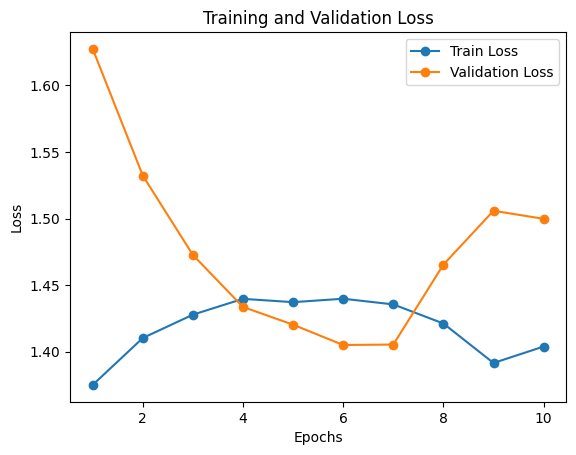